In [1]:
import os

import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random

import logging
import time
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import load_model

import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#file_path = '/content/drive/MyDrive/boilers_drive/normalized_df.csv'
#train_csv_path = '/content/drive/MyDrive/boilers_drive/train_df.csv'
#val_csv_path = '/content/drive/MyDrive/boilers_drive/val_df.csv'
#test_csv_path = '/content/drive/MyDrive/boilers_drive/test_df.csv'

Mounted at /content/drive


In [3]:
# Read the CSV file
#train_data = pd.read_csv(train_csv_path)
#val_data = pd.read_csv(val_csv_path)
#test_data = pd.read_csv(test_csv_path)

# Here we only need test data

In [4]:
#print(train_data)
#print(val_data)
#print(test_data)

In [5]:
# load pre-prepared random order of houses
random_order_houses = pd.read_csv('/content/drive/MyDrive/boilers_drive/random_order_houses.csv')

In [6]:
# Different houses in data
houses = random_order_houses['house_id'].unique().tolist()
print("Different houses in data:")
print(houses)
print("Number of different houses:")
print(len(houses))

Different houses in data:
['home9', 'home114', 'home5', 'home89', 'home17', 'home63', 'home2', 'home101', 'home14', 'home95', 'home111', 'home67', 'home77', 'home43', 'home86', 'home90', 'home47', 'home110', 'home93', 'home53', 'home34', 'home51', 'home106', 'home46', 'home79', 'home55', 'home65', 'home13']
Number of different houses:
28


**Comparing error metrics**

In [7]:
# load transformer error metrics from csv file
path_to_transformer_error_metrics = '/content/drive/Othercomputers/My_Laptop/code/transformer_error_metrics.csv'
transformer_error_metrics = pd.read_csv(path_to_transformer_error_metrics, index_col=0)
#transformer_error_metrics = pd.read_csv(path_to_transformer_error_metrics)

In [8]:
transformer_error_metrics = transformer_error_metrics.sort_values(by=['num_of_houses', 'categories'])
print(transformer_error_metrics.to_string(index=True))

                                    categories  num_of_houses  MAE_relevant_houses  MSE_relevant_houses  RMSE_relevant_houses  R2_relevant_houses  MAE_all_houses  MSE_all_houses  RMSE_all_houses  R2_all_houses  MAE_home9  MSE_home9  RMSE_home9  R2_home9  MAE_home114  MSE_home114  RMSE_home114  R2_home114  MAE_home5  MSE_home5  RMSE_home5  R2_home5  MAE_home89  MSE_home89  RMSE_home89  R2_home89  MAE_home17  MSE_home17  RMSE_home17  R2_home17  MAE_home63  MSE_home63  RMSE_home63  R2_home63  MAE_home2  MSE_home2  RMSE_home2  R2_home2  MAE_home101  MSE_home101  RMSE_home101  R2_home101  MAE_home14  MSE_home14  RMSE_home14  R2_home14  MAE_home95  MSE_home95  RMSE_home95  R2_home95  MAE_home111  MSE_home111  RMSE_home111  R2_home111  MAE_home67  MSE_home67  RMSE_home67  R2_home67  MAE_home77  MSE_home77  RMSE_home77  R2_home77  MAE_home43  MSE_home43  RMSE_home43  R2_home43  MAE_home86  MSE_home86  RMSE_home86  R2_home86  MAE_home90  MSE_home90  RMSE_home90  R2_home90  MAE_home47  MSE_home4

In [10]:
# save the updated dataframe back to csv file
#transformer_error_metrics.to_csv(path_to_transformer_error_metrics)

In [11]:
def plot_error_metrics_columns(column_names):
    # extracting the model names (from the row index)
    model_names = transformer_error_metrics.index

    plt.figure(figsize=(10, 6))

    # creating one line per column
    for col in column_names:
        column_values = transformer_error_metrics[col]
        plt.plot(range(len(model_names)), column_values, linestyle='-', label=col)  # Plot using the index positions

    # correctly set the model_names to the x-axis labels
    plt.xticks(ticks=range(len(model_names)), labels=model_names, rotation=45, ha='right')

    # labels and titles
    plt.xlabel('Model Name')
    plt.ylabel('Error Metrics')
    plt.title('Error Metrics by Model Name')
    plt.legend()

    # show the plot
    plt.tight_layout()  # adjusts layout to prevent clipping
    plt.show()

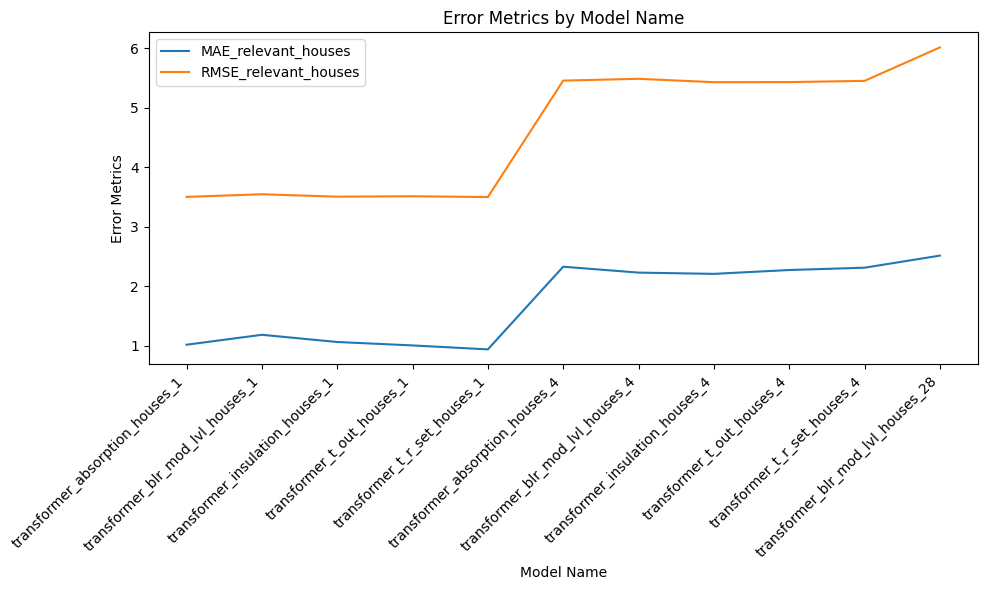

In [12]:
plot_error_metrics_columns(['MAE_relevant_houses', 'RMSE_relevant_houses'])

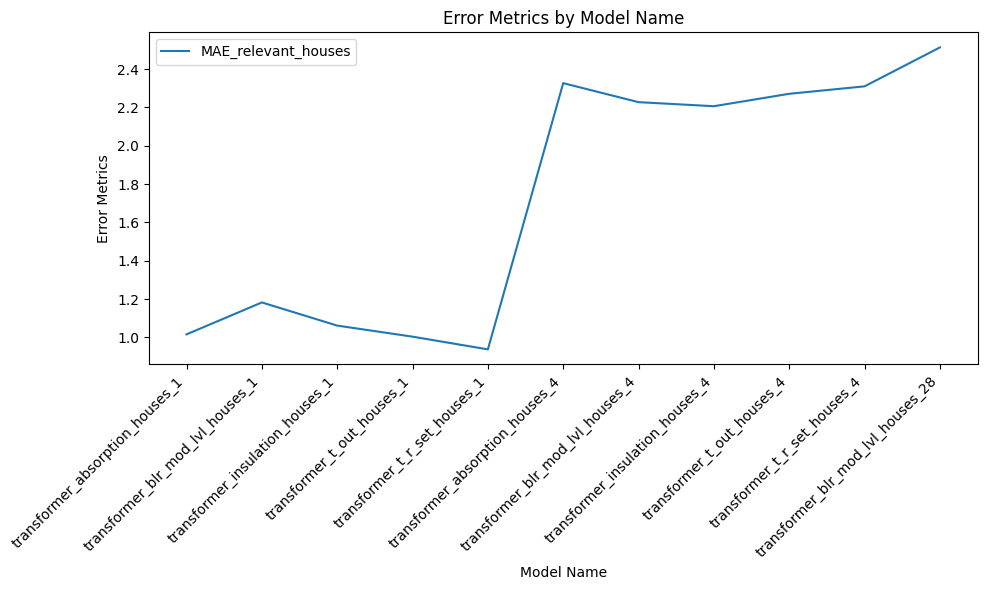

In [13]:
plot_error_metrics_columns(['MAE_relevant_houses'])

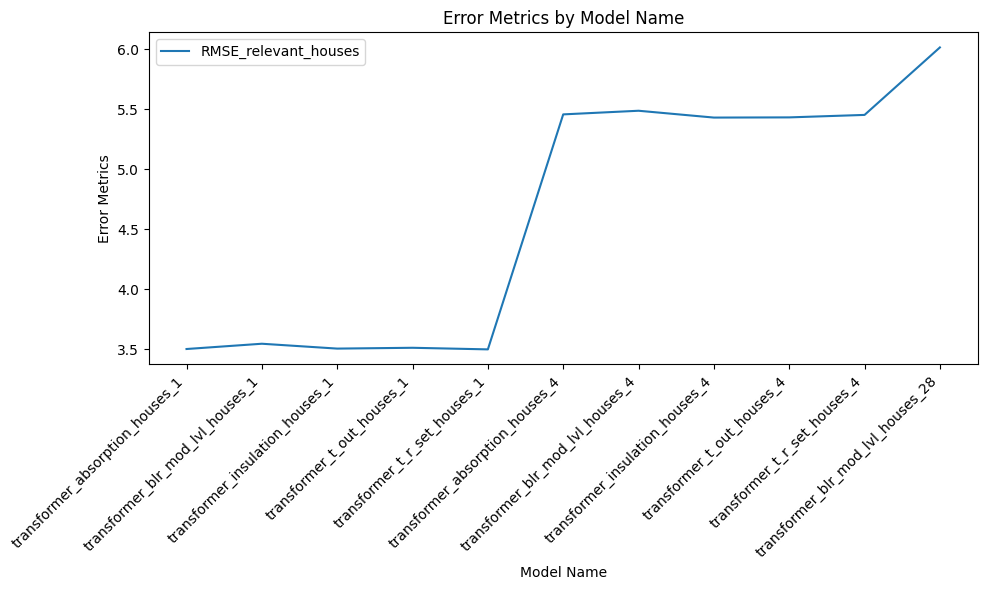

In [14]:
plot_error_metrics_columns(['RMSE_relevant_houses'])

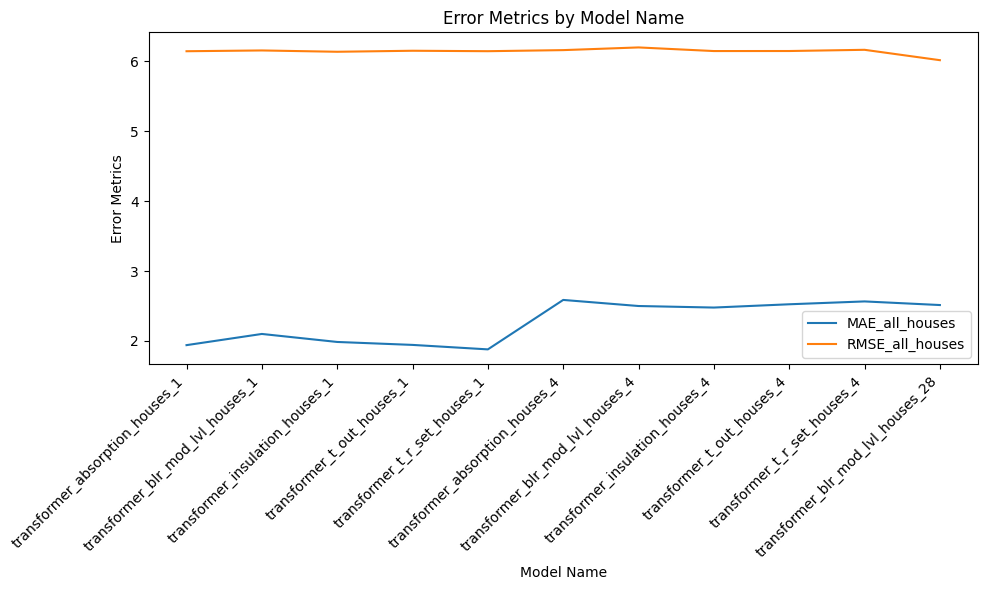

In [15]:
plot_error_metrics_columns(['MAE_all_houses', 'RMSE_all_houses'])

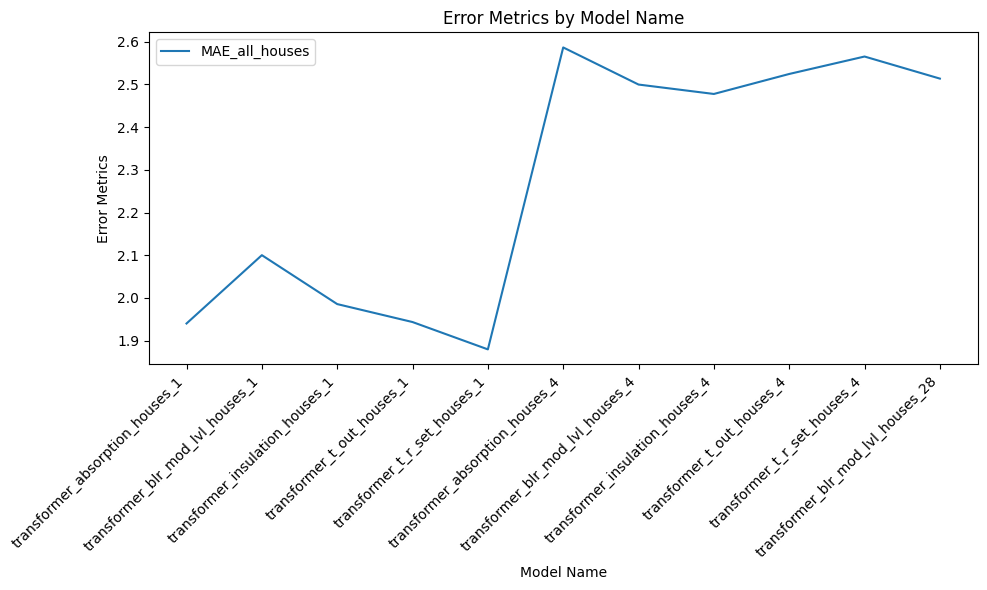

In [16]:
plot_error_metrics_columns(['MAE_all_houses'])

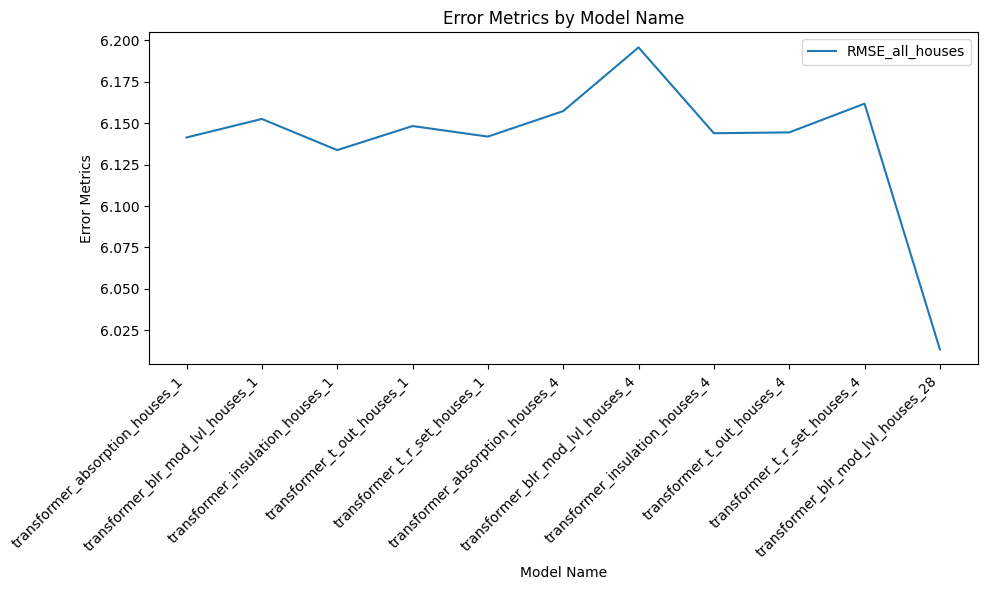

In [17]:
plot_error_metrics_columns(['RMSE_all_houses'])

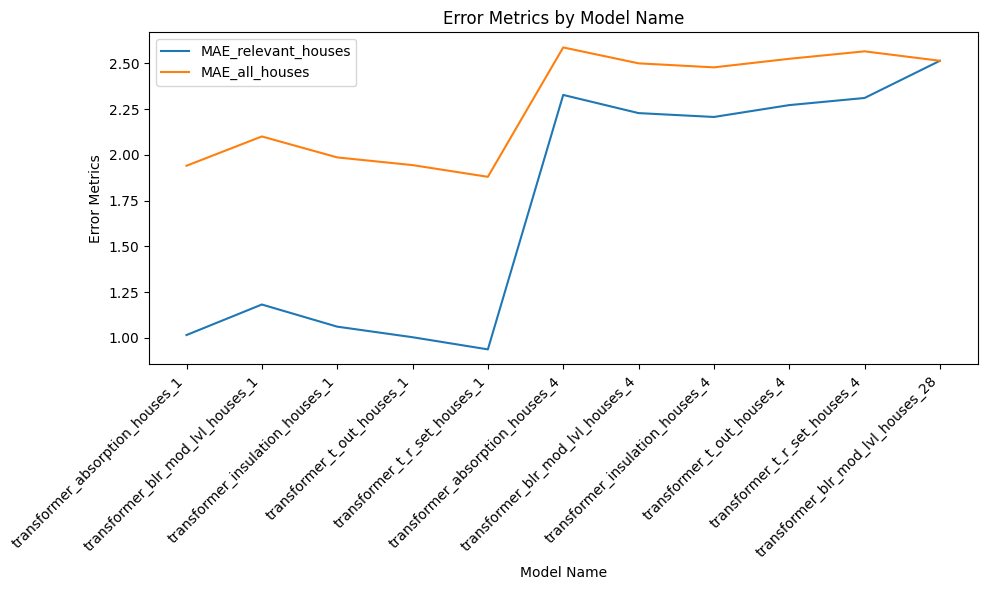

In [18]:
plot_error_metrics_columns(['MAE_relevant_houses', 'MAE_all_houses'])

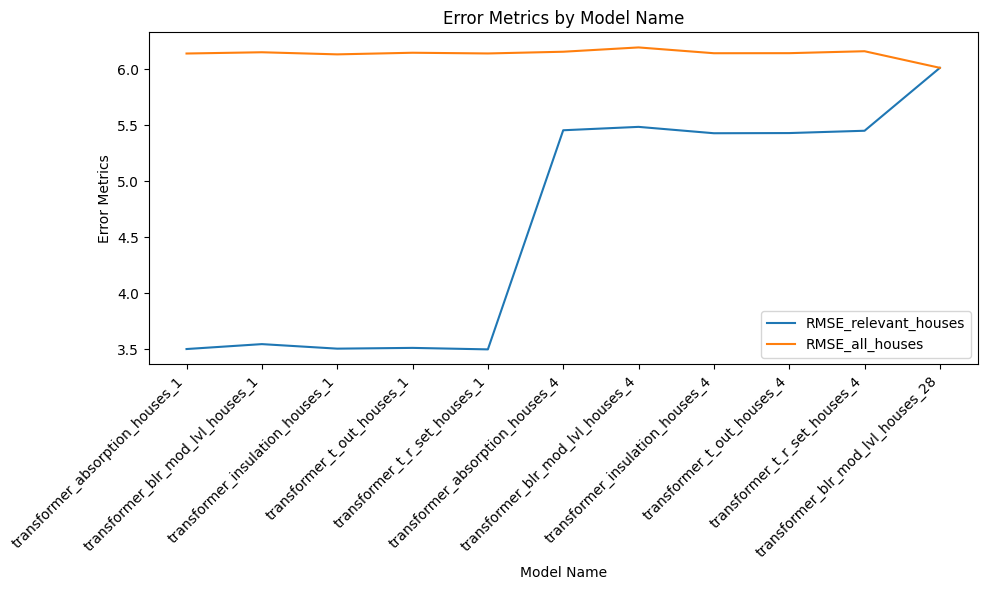

In [19]:
plot_error_metrics_columns(['RMSE_relevant_houses', 'RMSE_all_houses'])